In [71]:
%matplotlib inline

In [72]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from matplotlib.lines import Line2D

import pandas as pd
import numpy as np
Pyber_city_data = '../Pyber/data/city_data.csv'
Pyber_ride_data = '../Pyber/data/ride_data.csv'
Pyber_write_data = '../Pyber/data/write_ride_data.csv'


city_data_df = pd.read_csv(Pyber_city_data, low_memory=False)
ride_data_df = pd.read_csv(Pyber_ride_data, low_memory=False)

combine_city_ride_df = pd.merge( ride_data_df,city_data_df,
                                 how='left', on='city')
combine_city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

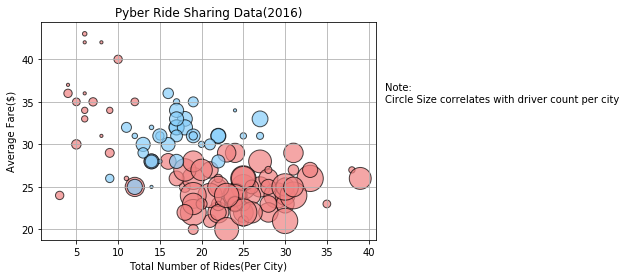

In [37]:
#### Obtain the x and y coordinates for each of the three city types

Urban_type_df = combine_city_ride_df.loc[combine_city_ride_df['type'] == 'Urban']
Suburban_type_df = combine_city_ride_df.loc[combine_city_ride_df['type'] == 'Suburban']
Rural_type_df  = combine_city_ride_df.loc[combine_city_ride_df['type'] == 'Rural']

#urban
#group the df by city
urban_city_ride_group = Urban_type_df.groupby('city' )
urban_combine_mean = round(urban_city_ride_group["fare"].mean(),0)
urban_combine_count = urban_city_ride_group["ride_id"].count()
urban_driver_count =  urban_city_ride_group["driver_count"].max()
 
#create a summary df
urban_city_ride_df = pd.DataFrame({"Average Fare":urban_combine_mean ,"Ride Count":urban_combine_count,
                             "type":type,"driver_count":urban_driver_count})

#Suburban
#group the df by city
Suburban_city_ride_group = Suburban_type_df.groupby('city' )
Suburban_combine_mean = round(Suburban_city_ride_group["fare"].mean(),0)
Suburban_combine_count = Suburban_city_ride_group["ride_id"].count()
Suburban_driver_count =  Suburban_city_ride_group["driver_count"].max()
 
#create a summary df
Suburban_city_ride_df = pd.DataFrame({"Average Fare":Suburban_combine_mean ,"Ride Count":Suburban_combine_count,
                             "type":type,"driver_count":Suburban_driver_count})

#rural
#group the df by city
rural_city_ride_group = Rural_type_df.groupby('city' )
rural_combine_mean = round(rural_city_ride_group["fare"].mean(),0)
rural_combine_count = rural_city_ride_group["ride_id"].count()
rural_driver_count =  rural_city_ride_group["driver_count"].max()
 
#create a summary df
rural_city_ride_df = pd.DataFrame({"Average Fare":rural_combine_mean ,"Ride Count":rural_combine_count,
                             "type":type,"driver_count":rural_driver_count})
# Build the scatter plots for each city types

Urban = plt.scatter( x=urban_city_ride_df["Ride Count"], y=urban_city_ride_df["Average Fare"], marker="o",s=urban_city_ride_df["driver_count"]*10,facecolors="lightcoral", edgecolors="black", alpha=0.70)
Suburban = plt.scatter( x=Suburban_city_ride_df["Ride Count"], y=Suburban_city_ride_df["Average Fare"], marker="o",s=Suburban_city_ride_df["driver_count"]*10,facecolors="lightskyblue", edgecolors="black", alpha=0.70)
rural = plt.scatter( x=rural_city_ride_df["Ride Count"], y=rural_city_ride_df["Average Fare"], marker="o",s=rural_city_ride_df["driver_count"]*10,facecolors="lightcoral", edgecolors="black", alpha=0.70)


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.grid()



plt.text(42,35, 'Note:\nCircle Size correlates with driver count per city' )

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("../Images/PyberRideSharing.png")


plt.show()

In [74]:
# Show plot
plt.show()

## Total Fares by City Type

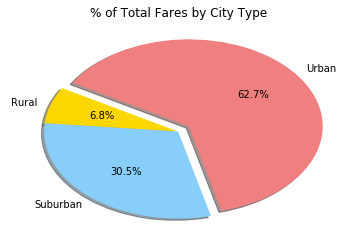

In [75]:
# Calculate Type Percents

city_type_group = combine_city_ride_df.groupby("type")

fare_type_count = city_type_group["fare"].sum()


# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban"]

# The colors of each section of the pie chart
colors = [ "gold","lightskyblue","lightcoral",]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(fare_type_count, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../Images/Pyber_fare_type_pie.png")


In [76]:
# Show Figure
plt.show()

## Total Rides by City Type

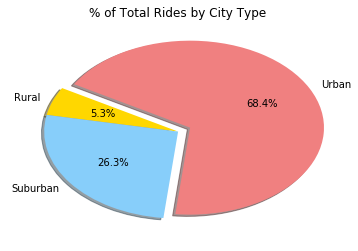

In [77]:
# Calculate Type Percents

ride_type_count = city_type_group["ride_id"].count()

# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban"]

# The colors of each section of the pie chart
colors = [ "gold","lightskyblue","lightcoral",]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(ride_type_count, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Images/Pyber_ride_type_pie.png")

In [78]:
# Show Figure
plt.show()

## Total Drivers by City Type

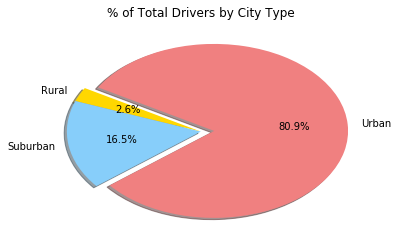

In [79]:
# Calculate Type Percents
driver_type_group = city_data_df.groupby("type")
driver_type_count = driver_type_group["driver_count"].sum()

# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban"]

# The colors of each section of the pie chart
colors = [ "gold","lightskyblue","lightcoral",]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(driver_type_count, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("../Images/Pyber_ride_type_pie.png")

In [80]:
# Show Figure
plt.show()